In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("datasets_raw_processed.csv").iloc[:,1]

In [3]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 36) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 36)
SARIMAX: (0, 0, 1) x (0, 1, 0, 36)
SARIMAX: (0, 1, 0) x (0, 1, 1, 36)
SARIMAX: (0, 1, 0) x (1, 0, 0, 36)


In [4]:
train_data = data[9886:-108]
test_data = data[-108:]

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [ ]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [ ]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [ ]:
pred0 = results.get_prediction(start=36, dynamic=False)
pred0_ci = pred0.conf_int()

In [36]:
pred1 = results.get_prediction(start=36, dynamic=True)
pred1_ci = pred1.conf_int()

       lower power  upper power
9922  -2141.772741  2412.859094
9923  -2459.046104  2717.820970
9924  -2698.085274  2949.142900
9925  -2881.903241  3125.791703
9926  -3022.507981  3261.624187
...            ...          ...
10802 -4049.055679  4220.814678
10803 -4049.116321  4210.753369
10804 -4048.927350  4202.793991
10805 -4050.533807  4194.549742
10806 -4051.643444  4188.033699

[885 rows x 2 columns]


[13.380442578506937, 16.072417196562558, 20.176754598499954, 26.02138553316484, 21.78630024845704, 46.815625905501925, 58.668484811785234, 65.95760057614002, 71.86796322416319, 76.85457122120447, 81.5629629574348, 81.89772839081911, 81.30425893526308, 79.37406618758253, 78.71050345699311, 70.58140659746729, 59.34208542138154, 57.27774901767387, 48.30341249682131, 43.485440348300806, 37.65929034711918, 33.07413176483017, 30.77066039272059, 26.150184561351725, 22.500908167326948, 20.610295673424524, 14.107955365953362, 8.01855257371429, 8.687149753500472, 5.345283249042689, 2.751574748135515, 1.2834313378034228, 1.902718091601415, 4.305206827293178, 7.6878366951581345, 12.540272625720513, 16.542625610926155, 19.780844340679327, 22.936321828491625, 27.654814805899505, 25.66088166797376, 46.20451323238167, 58.72316169761671, 66.48759968281122, 73.11579572254037, 78.50285954394668, 83.20504486015945, 84.3592491233195, 84.46804821346149, 82.73507762948654, 81.55485102961718, 75.5677016119971

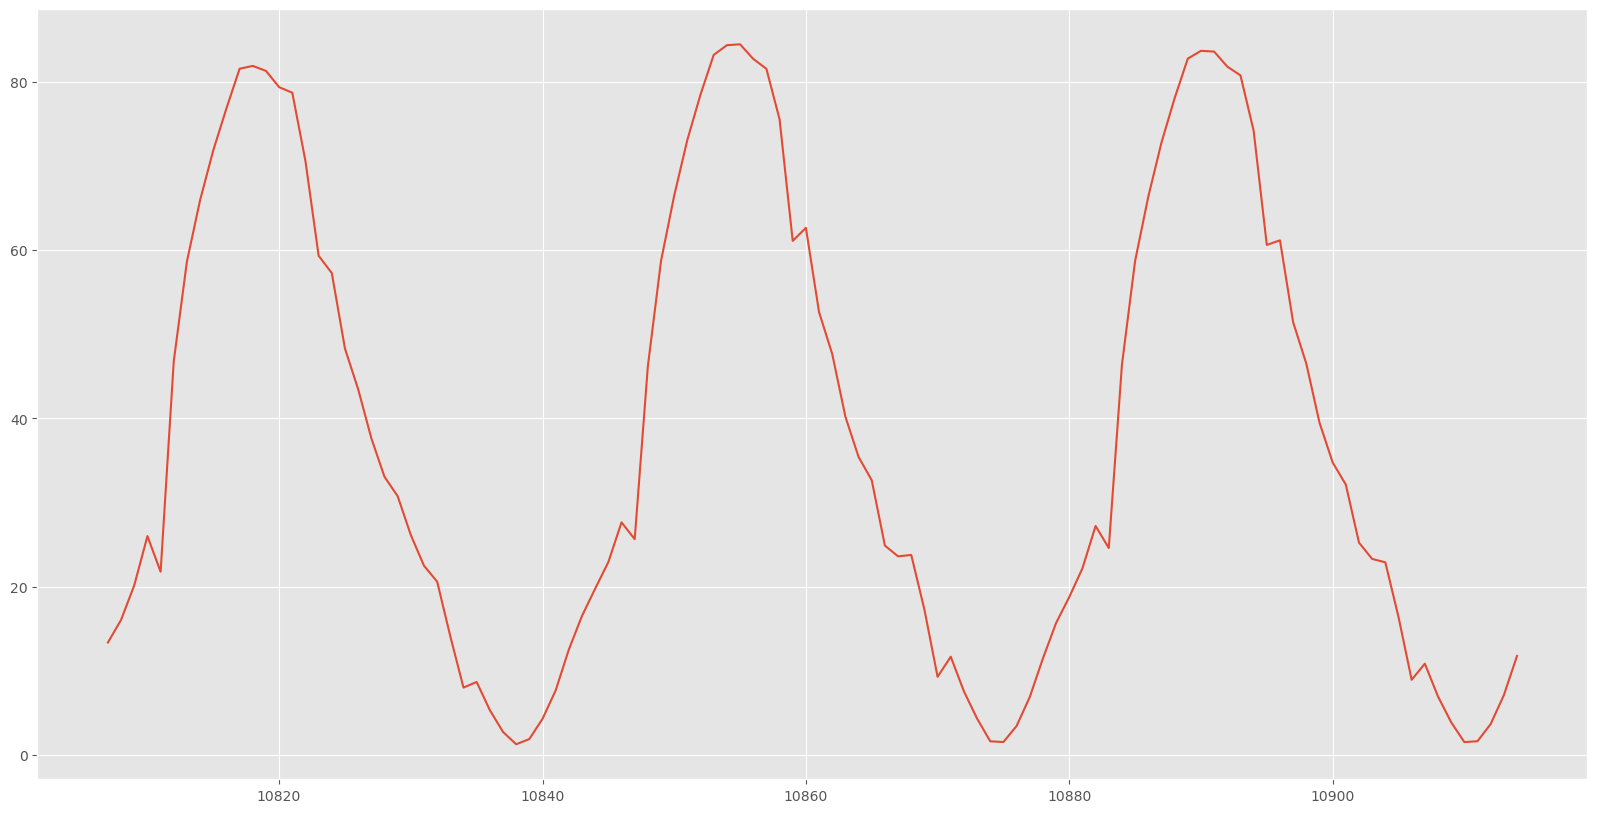

In [38]:
pred2 = results.get_forecast(108)
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean.tolist())
plt.plot(pred2.predicted_mean)
plt.show()